In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


In [2]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
from rwtools.nemesis.graph.utils import equalize_path_lengths

def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)



TypeError: get_root() takes 1 positional argument but 2 were given

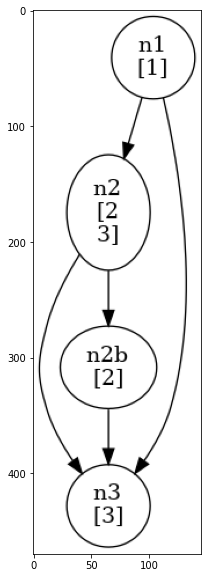

In [3]:
%autoreload 2
from rwtools.nemesis.graph.utils import get_root 
from rwtools.nemesis.graph.balance import balance_branching_point, balance_node_latencies

G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2, 3], "n2")
n2b = AbstractNemesisNode([2], "n2b")
n3 = AbstractNemesisNode([3], "n3")

g_nodes = [n1, n2, n2b, n3]

G.add_node(n1)
G.add_node(n2)
G.add_node(n2b)
G.add_node(n3)

G.add_edge(n1, n2)
G.add_edge(n2, n2b)
G.add_edge(n2b, n3)
G.add_edge(n1,n3) 
G.add_edge(n2, n3)

to_png(G)

cfg = ControlFlowGraph(nodes=[n1, n2, n3], graph=G)

root = get_root(G, g_nodes)

equalize_path_lengths(G, root, n3)

to_png(G)

balance_branching_point(G, n1)

to_png(G)

balancing n2 and n1n3


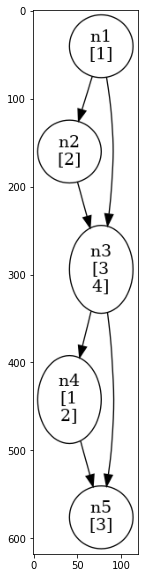

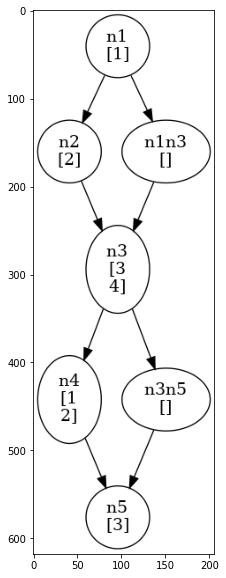

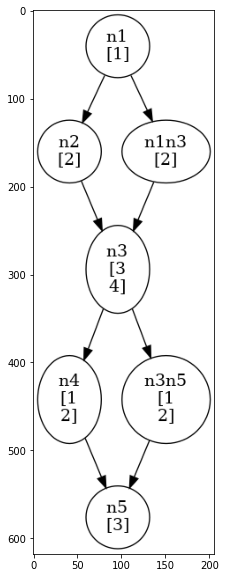

In [4]:
from rwtools.nemesis.graph.utils import insert_nodes
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3,4], "n3")

n4 = AbstractNemesisNode([1,2], "n4")
n5 = AbstractNemesisNode([3], "n5")


g_nodes = [n1, n2, n3, n4, n5]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)
G.add_node(n5)

G.add_edge(n1, n2)
G.add_edge(n1, n3) 
G.add_edge(n2, n3)

G.add_edge(n3, n4)
G.add_edge(n3, n5)
G.add_edge(n4, n5)

# G.add_edge(n1, n5)

to_png(G)
insert_nodes(G)
to_png(G)

balance_branching_point(G, n1)
to_png(G)

balancing n2 and n1n5


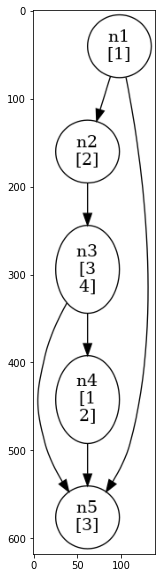

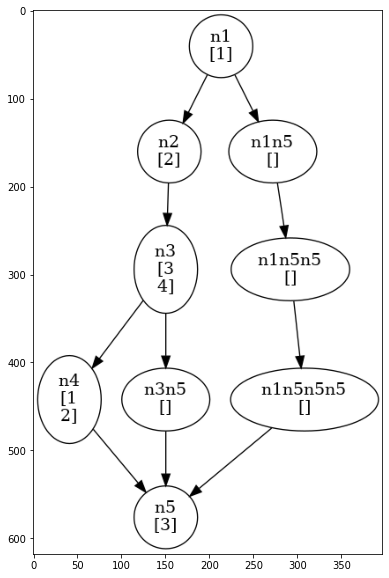

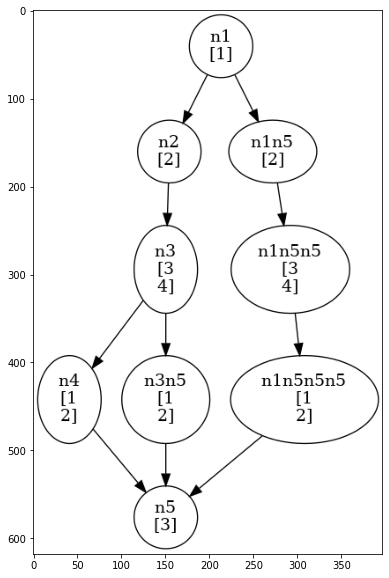

In [5]:
from rwtools.nemesis.graph.utils import insert_nodes
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3,4], "n3")

n4 = AbstractNemesisNode([1,2], "n4")
n5 = AbstractNemesisNode([3], "n5")


g_nodes = [n1, n2, n3, n4, n5]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)
G.add_node(n5)

G.add_edge(n1, n2)
# G.add_edge(n1, n3) 
G.add_edge(n2, n3)

G.add_edge(n3, n4)
G.add_edge(n3, n5)
G.add_edge(n4, n5)

G.add_edge(n1, n5)

to_png(G)
insert_nodes(G)
to_png(G)

balance_branching_point(G, n1)
to_png(G)

warning, no nop instruction found with latency 3
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 1


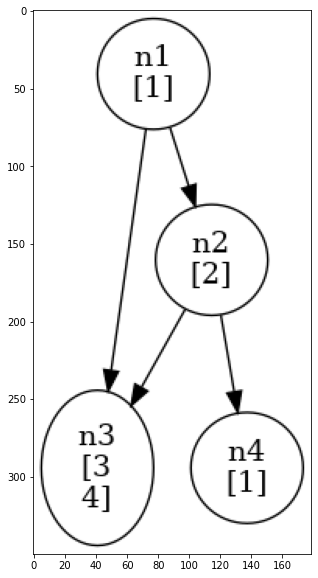

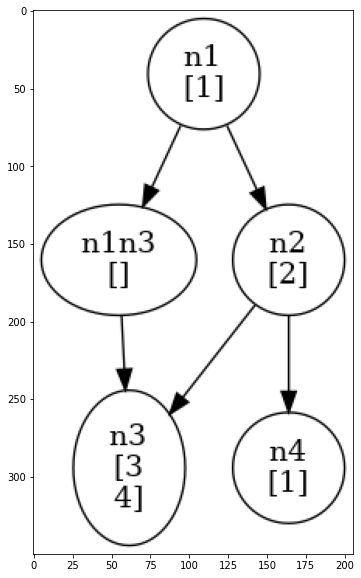

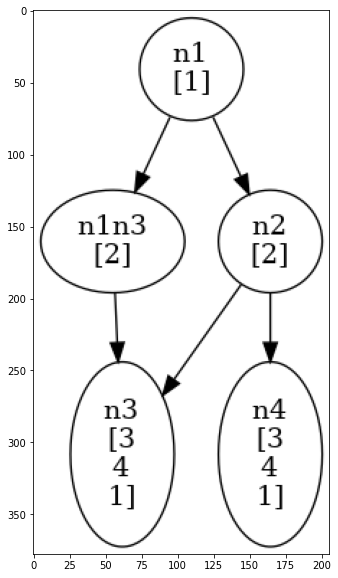

In [34]:
from rwtools.nemesis.graph.utils import insert_nodes
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3,4], "n3")
n4 = AbstractNemesisNode([1], "n4")

g_nodes = [n1, n2, n3, n4]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)

G.add_edge(n1, n2)
G.add_edge(n2, n3) 
G.add_edge(n2, n4) 
G.add_edge(n1, n3)



to_png(G)
insert_nodes(G)
to_png(G)

balance_branching_point(G, n1)
to_png(G)

warning, no nop instruction found with latency 3
warning, no nop instruction found with latency 1
warning, no nop instruction found with latency 2
warning, no nop instruction found with latency 3
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 2


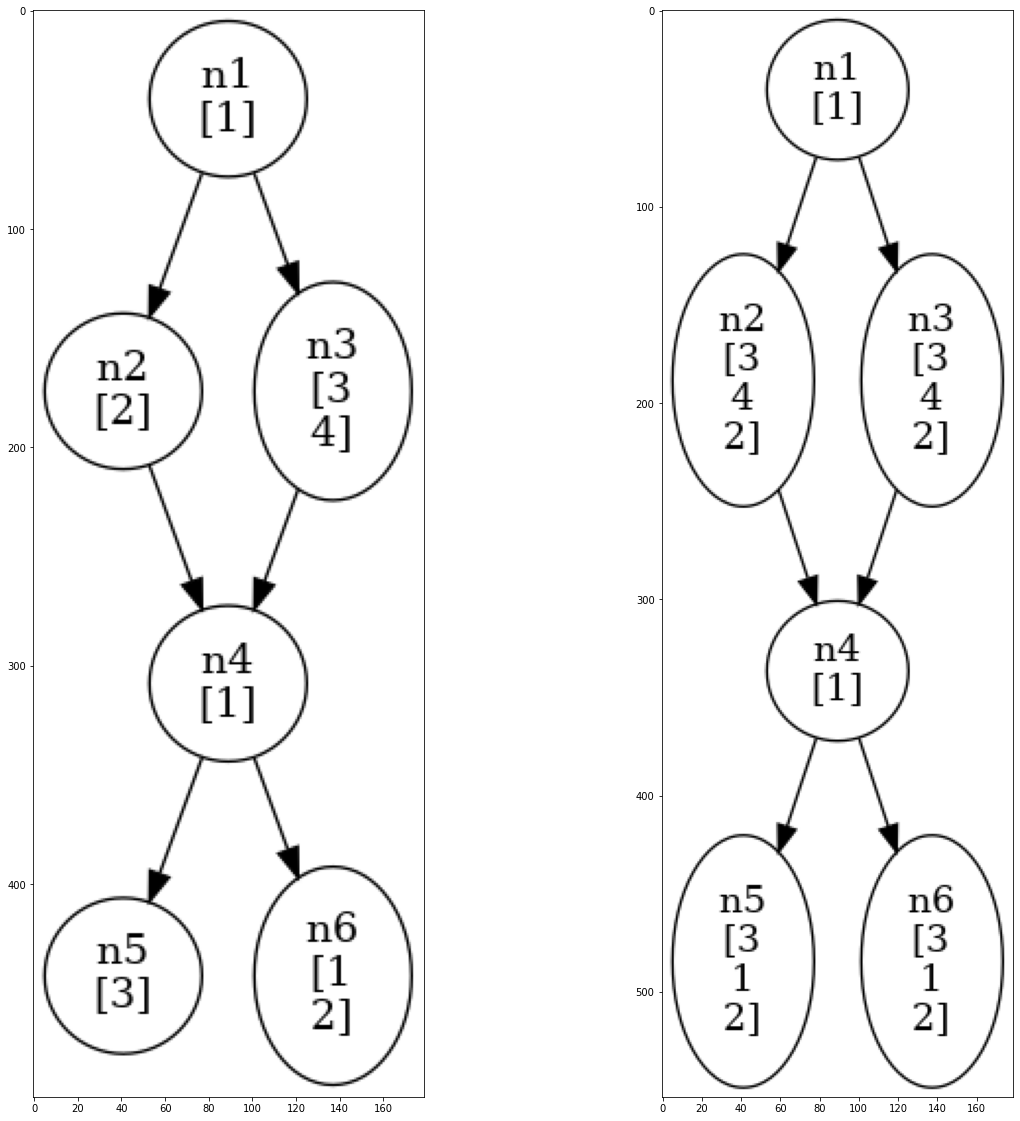

In [25]:
from rwtools.nemesis.graph.utils import insert_nodes, to_img
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3,4], "n3")
n4 = AbstractNemesisNode([1], "n4")
n5 = AbstractNemesisNode([3], "n5")
n6 = AbstractNemesisNode([1,2], "n6")

g_nodes = [n1, n2, n3, n4]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)

G.add_edge(n1, n2)
G.add_edge(n1, n3)
G.add_edge(n2, n4)
G.add_edge(n3, n4)
G.add_edge(n4, n5)
G.add_edge(n4, n6)


figs, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].imshow(to_img(G))

balance_branching_point(G, n1)

axs[1].imshow(to_img(G))

